In [13]:
import os

def gen_init():
    results_path = "/Users/sakshmenon/Desktop/results"
    os.chdir(results_path)
    files = [file.name for file in os.scandir()]
    
    file_map = {'sc': {'pj':{'bfs': '' ,'bts': '','graph': '', 'faiss': ''}, 'pm': {'bfs': '' ,'bts': '','graph': '', 'faiss': ''}, 'pc': {'bfs': '' ,'bts': '','graph': '', 'faiss': ''}},
            'sp': {'pj':{'bfs': '' ,'bts': '','graph': '', 'faiss': ''}, 'pm': {'bfs': '' ,'bts': '','graph': '', 'faiss': ''}, 'pc': {'bfs': '' ,'bts': '','graph': '', 'faiss': ''}},
            'td': {'pj':{'bfs': '' ,'bts': '','graph': '', 'faiss': ''}, 'pm': {'bfs': '' ,'bts': '','graph': '', 'faiss': ''}, 'pc': {'bfs': '' ,'bts': '','graph': '', 'faiss': ''}},
            'td_sp_sc': {'pj':{'bfs': '' ,'bts': '','graph': '', 'faiss': ''}, 'pm': {'bfs': '' ,'bts': '','graph': '', 'faiss': ''}, 'pc': {'bfs': '' ,'bts': '','graph': '', 'faiss': ''}}}

    for file in files:
        segments = file.split('.')
        organisms = segments[0]
        algorithm = segments[1]
        mode = segments[2]

        organisms = organisms.split('2')
        org1 = organisms[0]
        org2 = organisms[1]

        org1 = org1[:3:2]

        if mode == 'k3':
            org2 = org2[0] + org2[org2.find('_') + 1]

        file_map[org2][org1][algorithm] = file

    return file_map

In [14]:
import re

def extract_times(file_content):
    # Patterns that match any phrase before "time for" and the time value
    total_time_pattern = r"Total search time for .*:\s+([\d.]+)\s+seconds"
    average_time_pattern = r"Average search time for .*:\s+([\d.]+)\s+seconds"

    # Search for total and average times in the content
    total_time_match = re.search(total_time_pattern, file_content)
    average_time_match = re.search(average_time_pattern, file_content)

    if total_time_match and average_time_match:
        total_time = float(total_time_match.group(1))
        average_time = float(average_time_match.group(1))
        return total_time, average_time
    else:
        raise ValueError("Total or average time not found in the file.")


In [15]:
org1s = ['pj', 'pm', 'pc']
org2s = ['sc', 'sp', 'td', 'td_sp_sc']
algos = ['bfs', 'bts', 'graph', 'faiss']

def data_gen(sub_org, file_map):
    total_time = {'pj': {'bfs': '' ,'bts': '','graph': '', 'faiss': ''}, 
                  'pm': {'bfs': '' ,'bts': '','graph': '', 'faiss': ''}, 
                  'pc': {'bfs': '' ,'bts': '','graph': '', 'faiss': ''}}
    avg_time = {'pj': {'bfs': '' ,'bts': '','graph': '', 'faiss': ''}, 
                'pm': {'bfs': '' ,'bts': '','graph': '', 'faiss': ''}, 
                'pc': {'bfs': '' ,'bts': '','graph': '', 'faiss': ''}}
    
    for main_org in org1s:
        for algo in algos:
            file = file_map[sub_org][main_org][algo]
            with open(file) as f:
                file_content = f.read()
                total, average = extract_times(file_content)

                total_sub_dict = {'value': total, 'file': file}
                avg_sub_dict = {'value': average, 'file': file}

                total_time[main_org][algo] = total_sub_dict 
                avg_time[main_org][algo] = avg_sub_dict

                # print(f"Total Time: {total_time} seconds")
                # print(f"Average Time: {average_time} seconds")
            

    return total_time, avg_time


In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_multi_bar_leg(data, org):
    # Extract the top-level keys (the categories for the bars)
    categories = list(data.keys())
    
    # Extract the inner keys for the sub-categories (the bars within each category)
    sub_categories = list(next(iter(data.values())).keys())

    # Extract the values for each category and sub-category
    values = [[data[cat][sub_cat]['value'] for sub_cat in sub_categories] for cat in categories]
    
    # Number of categories and sub-categories
    num_categories = len(categories)
    num_sub_categories = len(sub_categories)
    
    # Set up bar width and positions
    bar_width = 0.2  # Width of each bar
    index = np.arange(num_sub_categories)  # Positions for the sub-categories on the x-axis

    # Create the figure and axis
    fig, ax = plt.subplots()

    # Loop through categories to plot each set of bars
    for i, (cat, cat_values) in enumerate(zip(categories, values)):
        # Set the position for each bar group
        bar_positions = index + i * bar_width
        ax.bar(bar_positions, cat_values, bar_width, label=cat)
    
    # Add labels and title
    ax.set_xlabel('Sub-Categories')
    ax.set_ylabel('Values')
    ax.set_title('Multi Bar Plot With Organism ' + org)

    # Set the x-axis tick positions and labels
    ax.set_xticks(index + bar_width * (num_categories - 1) / 2)
    ax.set_xticklabels(sub_categories)

    # Add a legend to differentiate between the categories
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()


In [17]:
import matplotlib.pyplot as plt
import numpy as np

def plot_multi_bar(data, org, type):
    # Extract the top-level keys (the categories for the x-axis)
    categories = list(data.keys())
    
    # Extract the sub-categories (each category will have these sub-bars)
    sub_categories = list(next(iter(data.values())).keys())

    # Extract the values for each category and sub-category
    values = [[data[cat][sub_cat]['value'] for sub_cat in sub_categories] for cat in categories]
    
    # Number of categories and sub-categories
    num_categories = len(categories)
    num_sub_categories = len(sub_categories)
    
    # Set up bar width and positions
    bar_width = 0.2  # Width of each sub-bar
    index = np.arange(num_categories)  # Positions for the categories on the x-axis

    # Create the figure and axis
    fig, ax = plt.subplots()

    # Loop through sub-categories to plot each group of bars within a category
    for i, sub_cat in enumerate(sub_categories):
        # Set the position for each sub-bar group
        bar_positions = index + i * bar_width
        # Extract the values for the current sub-category across all categories
        sub_cat_values = [data[cat][sub_cat]['value'] for cat in categories]
        ax.bar(bar_positions, sub_cat_values, bar_width, label=sub_cat)
    
    # Add labels and title
    ax.set_xlabel('Organisms')
    ax.set_ylabel('Total Time')
    ax.set_title('Bar Plot of ' + type + ' Time vs Algorithms ' + '(' + org + ')')

    # Set the x-axis tick positions and labels
    ax.set_xticks(index + bar_width * (num_sub_categories - 1) / 2)
    ax.set_xticklabels(categories)

    # Add a legend to differentiate between the sub-categories
    ax.legend(title='Sub-Categories')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:



In [24]:
import pandas as pd
pd.DataFrame(avg_data)

,pj,pm,pc
bfs,"{'value': 0.02822, 'file': 'p_jirovecii2td_sp_...","{'value': 0.02786, 'file': 'p_murina2td_sp_sc....","{'value': 0.02728, 'file': 'p_carinii2td_sp_sc..."
bts,"{'value': 0.02447, 'file': 'p_jirovecii2td_sp_...","{'value': 0.02437, 'file': 'p_murina2td_sp_sc....","{'value': 0.02436, 'file': 'p_carinii2td_sp_sc..."
graph,"{'value': 0.00018, 'file': 'p_jirovecii2td_sp_...","{'value': 0.00018, 'file': 'p_murina2td_sp_sc....","{'value': 0.00018, 'file': 'p_carinii2td_sp_sc..."
faiss,"{'value': 0.00427, 'file': 'p_jirovecii2td_sp_...","{'value': 0.00418, 'file': 'p_murina2td_sp_sc....","{'value': 0.00417, 'file': 'p_carinii2td_sp_sc..."


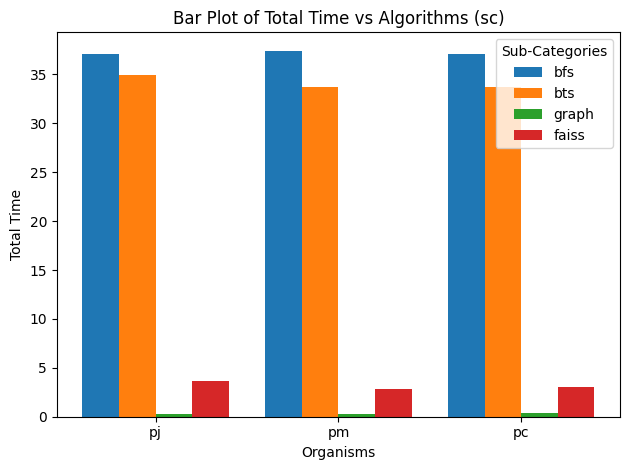

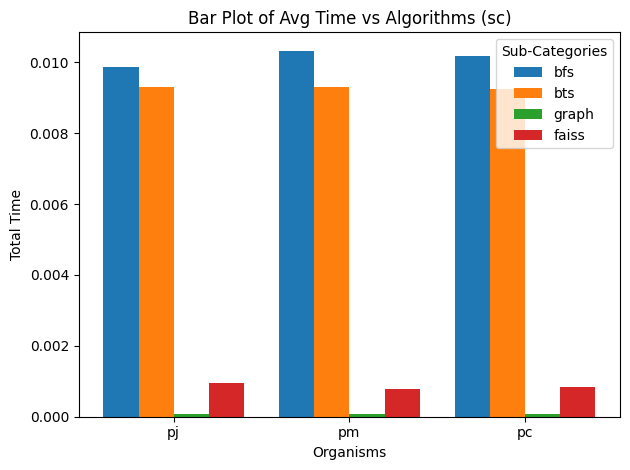

In [18]:
file_map = gen_init()
total_data, avg_data = data_gen('sc', file_map)
plot_multi_bar(total_data, 'sc', 'Total')
plot_multi_bar(avg_data, 'sc', 'Avg')

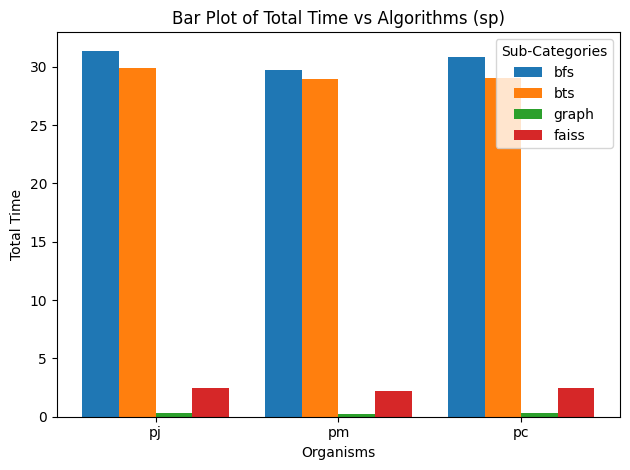

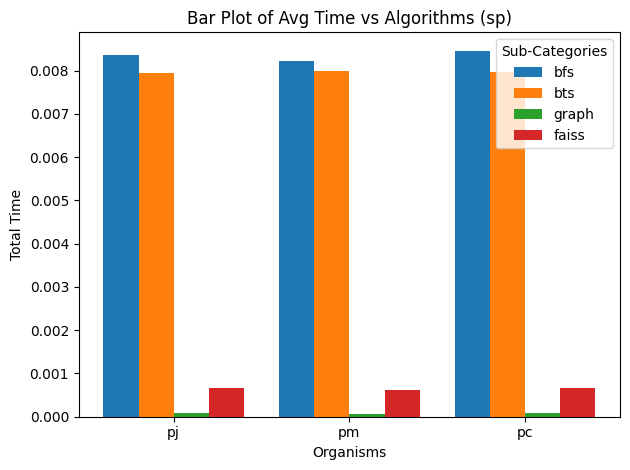

In [19]:
file_map = gen_init()
total_data, avg_data = data_gen('sp', file_map)
plot_multi_bar(total_data, 'sp', 'Total')
plot_multi_bar(avg_data, 'sp', 'Avg')

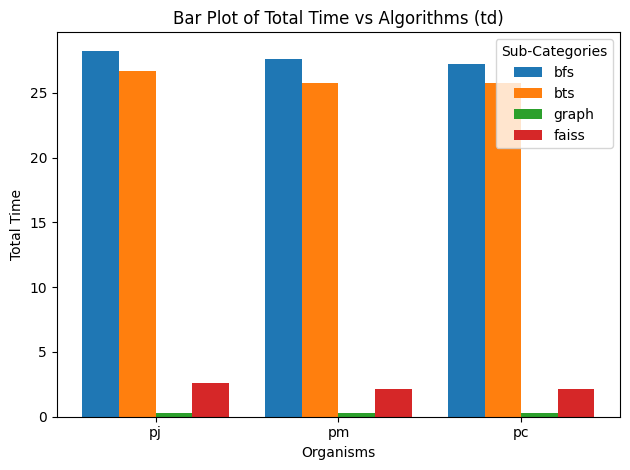

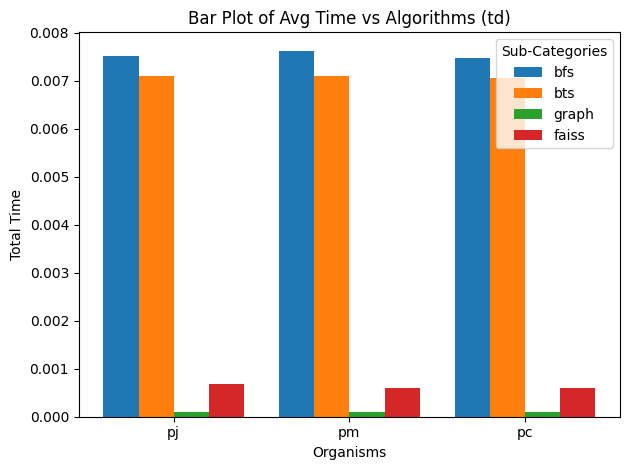

In [20]:
file_map = gen_init()
total_data, avg_data = data_gen('td', file_map)
plot_multi_bar(total_data, 'td', 'Total')
plot_multi_bar(avg_data, 'td', 'Avg')

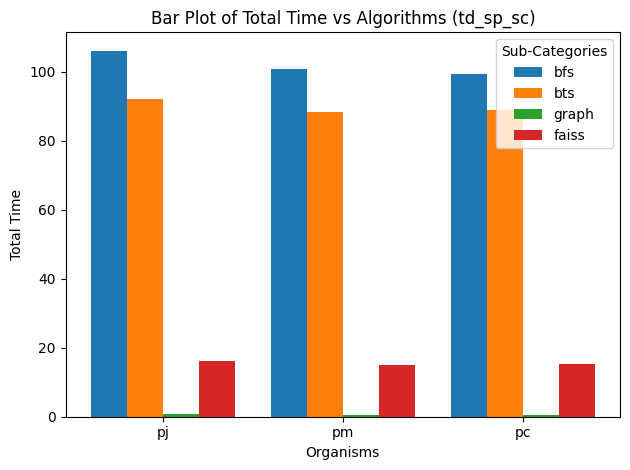

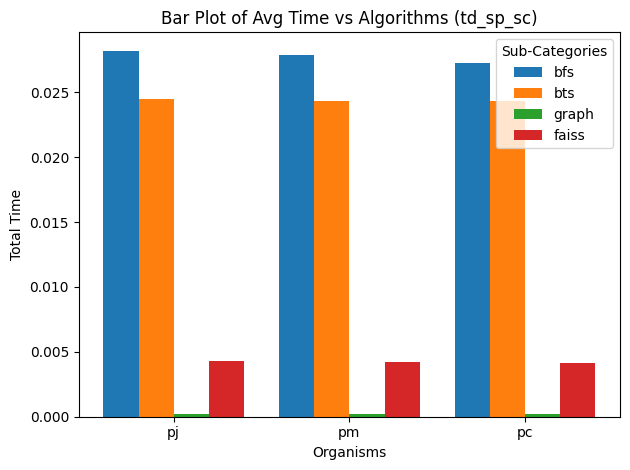

In [21]:
file_map = gen_init()
total_data, avg_data = data_gen('td_sp_sc', file_map)
plot_multi_bar(total_data, 'td_sp_sc', 'Total')
plot_multi_bar(avg_data, 'td_sp_sc', 'Avg')